In [1]:
# Import all libraries and dependencies
import pandas as pd
import os
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib.figure as figure
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


### This section is to set defualt options for pandas and other libraries

In [2]:
# Set default options for pandas and other libraries
pd.set_option('display.max_colwidth', None)

In [3]:
# Define the column names
# column_names = [
#     'Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 
#     'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
#     'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth',
#     'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP','Diabetes'
# ]
# Import Excel files
behavioural_raw_df = pd.read_csv("Resources/diabetes_data.csv").dropna()

In [4]:
behavioural_raw_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
behavioural_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [6]:
behavioural_raw_df.isna().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [7]:
behavioural_raw_df.dropna()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [8]:
#behavioural_raw_df = behavioural_raw_df.query("Sex == 1")

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(behavioural_raw_df)
X
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.sort_values('VIF Factor', ascending=False)


,VIF Factor,features
0,85.300090,const
12,1.892304,GenHlth
14,1.696768,PhysHlth
15,1.561441,DiffWalk
18,1.443484,Diabetes
17,1.389513,HighBP
1,1.320495,Age
13,1.248157,MentHlth
5,1.221424,BMI
7,1.194977,HeartDiseaseorAttack


In [9]:
# Create the labels set `y` and features DataFrame `X`
# generate code for feature selection Model
# Get the features (everything except the "Diabetes" column)
X = behavioural_raw_df.copy().drop(columns=["Diabetes"])
# filter X to only include Sex = 1

X.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Get the target column
y = behavioural_raw_df["Diabetes"].values.ravel()
y[0:5]

array([0., 0., 0., 0., 0.])

In [11]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
n_components = 5  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
n_components = 5  # Number of principal components to keep
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train_pca, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

# K-Fold Cross-Validation
k = 5  # Number of folds
kf = KFold(n_splits=k, random_state=42, shuffle=True)

# Perform K-Fold Cross-Validation
cv_scores = cross_val_score(rf_model, X_train_pca, y_train, cv=kf, scoring='accuracy')

print(f"{k}-Fold Cross-Validation Accuracy Scores:", cv_scores)
print(f"Mean {k}-Fold Cross-Validation Accuracy:", cv_scores.mean())

Accuracy: 0.7240257443949359
Classification Report:
               precision    recall  f1-score   support

         0.0       0.74      0.69      0.71      7070
         1.0       0.71      0.76      0.73      7069

    accuracy                           0.72     14139
   macro avg       0.73      0.72      0.72     14139
weighted avg       0.73      0.72      0.72     14139

5-Fold Cross-Validation Accuracy Scores: [0.72425073 0.7285828  0.71938821 0.71635721 0.72599469]
Mean 5-Fold Cross-Validation Accuracy: 0.7229147264061705


In [12]:
from sklearn.linear_model import LogisticRegression
# Create a `LogisticRegression` function and assign it 
# to a variable named `logistic_regression_model`.
logistic_regression_model = LogisticRegression(random_state=42)

# Fit the model
logistic_regression_model.fit(X_train_scaled, y_train)

# Score the model
print(f"Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

# Generate predictions from the model we just fit
training_predictions = logistic_regression_model.predict(X_train_scaled)

# Convert those predictions (and actual values) to a DataFrame
training_results_df = pd.DataFrame({"Prediction": training_predictions, "Actual": y_train})

# Apply the fitted model to the `test` dataset
testing_predictions = logistic_regression_model.predict(X_test_scaled)

# Save both the test predictions and actual test values to a DataFrame
testing_results = pd.DataFrame({
    "Testing Data Predictions": testing_predictions, 
    "Testing Data Actual Targets": y_test})

Training Data Score: 0.7481123901472955
Testing Data Score: 0.7453851050286442


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined

# Logistic Regression Model
logistic_regression_model = LogisticRegression(random_state=42)

# Fit the Logistic Regression model
logistic_regression_model.fit(X_train_scaled, y_train)

# Score the Logistic Regression model
print(f"Logistic Regression Training Data Score: {logistic_regression_model.score(X_train_scaled, y_train)}")
print(f"Logistic Regression Testing Data Score: {logistic_regression_model.score(X_test_scaled, y_test)}")

# Generate predictions from the Logistic Regression model
logistic_training_predictions = logistic_regression_model.predict(X_train_scaled)
logistic_testing_predictions = logistic_regression_model.predict(X_test_scaled)

# Convert Logistic Regression predictions to DataFrames
logistic_training_results_df = pd.DataFrame({"Prediction": logistic_training_predictions, "Actual": y_train})
logistic_testing_results_df = pd.DataFrame({"Prediction": logistic_testing_predictions, "Actual": y_test})

# Random Forest Model
random_forest_model = RandomForestClassifier(random_state=42)

# Fit the Random Forest model
random_forest_model.fit(X_train_scaled, y_train)

# Score the Random Forest model
print(f"Random Forest Training Data Score: {random_forest_model.score(X_train_scaled, y_train)}")
print(f"Random Forest Testing Data Score: {random_forest_model.score(X_test_scaled, y_test)}")

# Generate predictions from the Random Forest model
rf_training_predictions = random_forest_model.predict(X_train_scaled)
rf_testing_predictions = random_forest_model.predict(X_test_scaled)

# Convert Random Forest predictions to DataFrames
rf_training_results_df = pd.DataFrame({"Prediction": rf_training_predictions, "Actual": y_train})
rf_testing_results_df = pd.DataFrame({"Prediction": rf_testing_predictions, "Actual": y_test})

# Display the results
# print("Logistic Regression Training Results:")
# print(logistic_training_results_df.head())
# print("Logistic Regression Testing Results:")
# print(logistic_testing_results_df.head())

# print("Random Forest Training Results:")
# print(rf_training_results_df.head())
# print("Random Forest Testing Results:")
# print(rf_testing_results_df.head())

# Calculate accuracy Scores and confusion matrix and display them
from sklearn.metrics import accuracy_score, confusion_matrix

# Logistic Regression
logistic_training_accuracy = accuracy_score(logistic_training_predictions, y_train)
logistic_testing_accuracy = accuracy_score(logistic_testing_predictions, y_test)
logistic_confusion_matrix = confusion_matrix(y_test, logistic_testing_predictions)

# Random Forest
rf_training_accuracy = accuracy_score(rf_training_predictions, y_train)
rf_testing_accuracy = accuracy_score(rf_testing_predictions, y_test)
rf_confusion_matrix = confusion_matrix(y_test, rf_testing_predictions)

# Display the results
print("Logistic Regression Training Accuracy:", logistic_training_accuracy)
print("Logistic Regression Testing Accuracy:", logistic_testing_accuracy)
print("Logistic Regression Confusion Matrix:")
print(logistic_confusion_matrix)
print("\n")
print("Random Forest Training Accuracy:", rf_training_accuracy)
print("Random Forest Testing Accuracy:", rf_testing_accuracy)
print("Random Forest Confusion Matrix:")
print(rf_confusion_matrix)


Logistic Regression Training Data Score: 0.7481123901472955
Logistic Regression Testing Data Score: 0.7453851050286442
Random Forest Training Data Score: 0.9720085583435008
Random Forest Testing Data Score: 0.7240964707546502
Logistic Regression Training Accuracy: 0.7481123901472955
Logistic Regression Testing Accuracy: 0.7453851050286442
Logistic Regression Confusion Matrix:
[[5140 1930]
 [1670 5399]]


Random Forest Training Accuracy: 0.9720085583435008
Random Forest Testing Accuracy: 0.7240964707546502
Random Forest Confusion Matrix:
[[4864 2206]
 [1695 5374]]


Diabetes
0.0    35346
1.0    35346
Name: count, dtype: int64


<Axes: xlabel='Diabetes'>

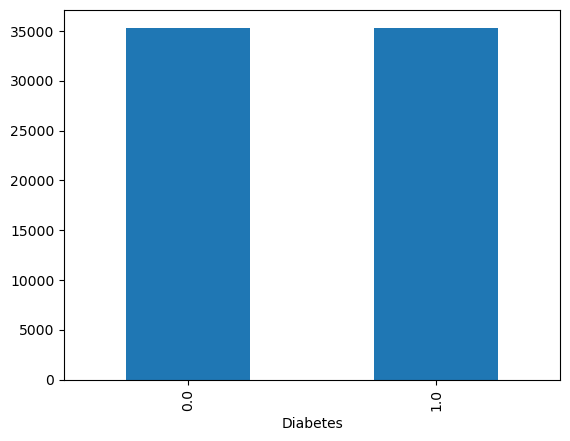

In [14]:
import pandas as pd



# Check the distribution of the target variable
class_distribution = behavioural_raw_df['Diabetes'].value_counts()
print(class_distribution)

# Plot the distribution (optional)
class_distribution.plot(kind='bar')

Sex
0.0    38386
1.0    32306
Name: count, dtype: int64


<Axes: xlabel='Diabetes'>

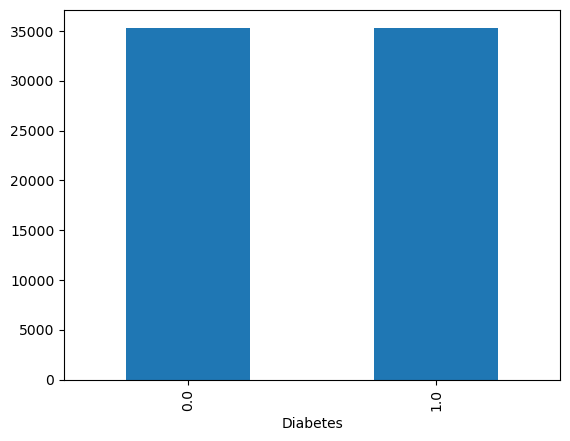

In [15]:
# check basing on sex column how many people have diabetes

class_distribution1 = behavioural_raw_df['Sex'].value_counts()
print(class_distribution1)
class_distribution.plot(kind='bar')

In [16]:
# Check how many males and females are there in the dataset

class_distribution = behavioural_raw_df['Sex'].value_counts()
class_distribution

# Annotate 0 as Female and 1 as Male in class_distribution
class_distribution.index = class_distribution.index.map({0: 'Female', 1: 'Male'})
class_distribution


Sex
Female    38386
Male      32306
Name: count, dtype: int64

Sex
Female    38386
Male      32306

In [17]:
# split HeavyAlchoholConsumption with Diabetes

class_distribution = behavioural_raw_df['HvyAlcoholConsump'].value_counts()


# Annotate 0 as No and 1 as Yes in 
class_distribution.index = class_distribution.index.map({0: 'No', 1: 'Yes'})

print(class_distribution)

# Check how many people have diabetes and how many don't have diabetes who consume alchohol


# Filter the data to include only those who consume alcohol
alcohol_consumers = behavioural_raw_df[behavioural_raw_df['HvyAlcoholConsump'] == 1]

# Group by diabetes status and count the number of occurrences
diabetes_counts = alcohol_consumers['Diabetes'].value_counts()

# Print the results
print("Number of people who consume alcohol and have diabetes:", diabetes_counts.get(1, 0))
print("Number of people who consume alcohol and don't have diabetes:", diabetes_counts.get(0, 0))

# Check how many people have diabetes and how many don't have diabetes who don't consume alchohol

# Filter the data to include only those who don't consume alcohol
non_alcohol_consumers = behavioural_raw_df[behavioural_raw_df['HvyAlcoholConsump'] == 0]

# Group by diabetes status and count the number of occurrences
diabetes_counts = non_alcohol_consumers['Diabetes'].value_counts()

# Print the results
print("Number of people who don't consume alcohol and have diabetes:", diabetes_counts.get(1, 0))
print("Number of people who don't consume alcohol and don't have diabetes:", diabetes_counts.get(0, 0))


HvyAlcoholConsump
No     67672
Yes     3020
Name: count, dtype: int64
Number of people who consume alcohol and have diabetes: 832
Number of people who consume alcohol and don't have diabetes: 2188
Number of people who don't consume alcohol and have diabetes: 34514
Number of people who don't consume alcohol and don't have diabetes: 33158


Age
10.0    8455
11.0    6094
12.0    3856
13.0    3192
Name: count, dtype: int64
Diabetes    No   Yes
Age                 
10.0      2788  5667
11.0      1807  4287
12.0      1152  2704
13.0      1019  2173


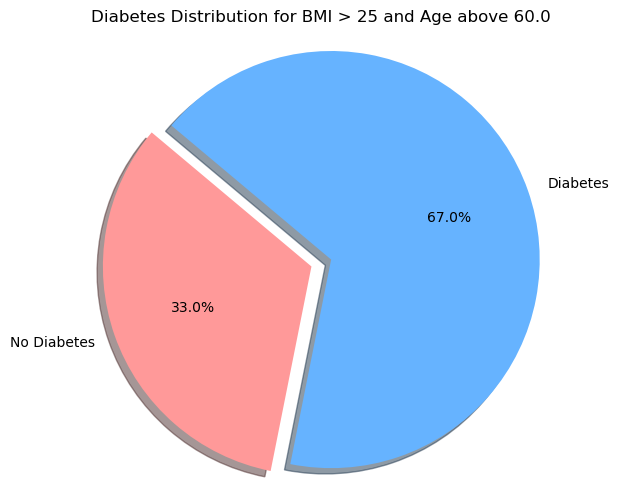

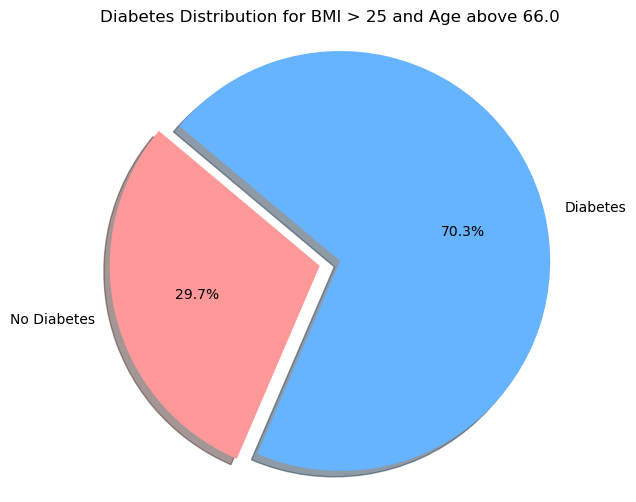

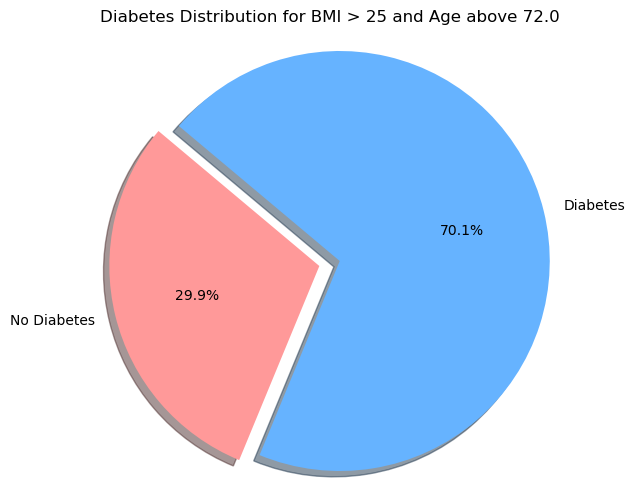

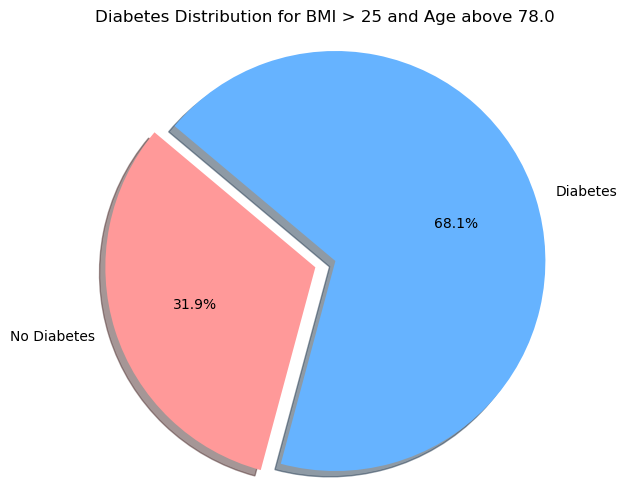

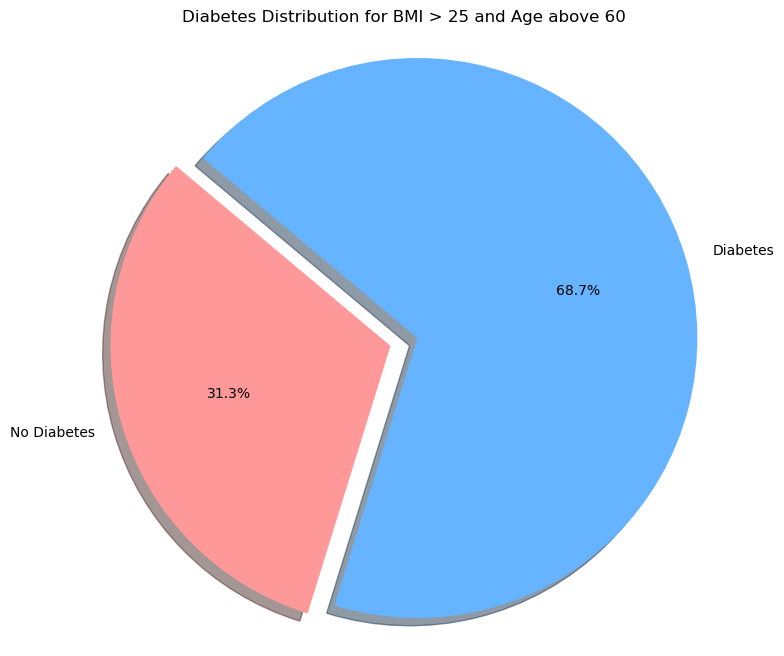

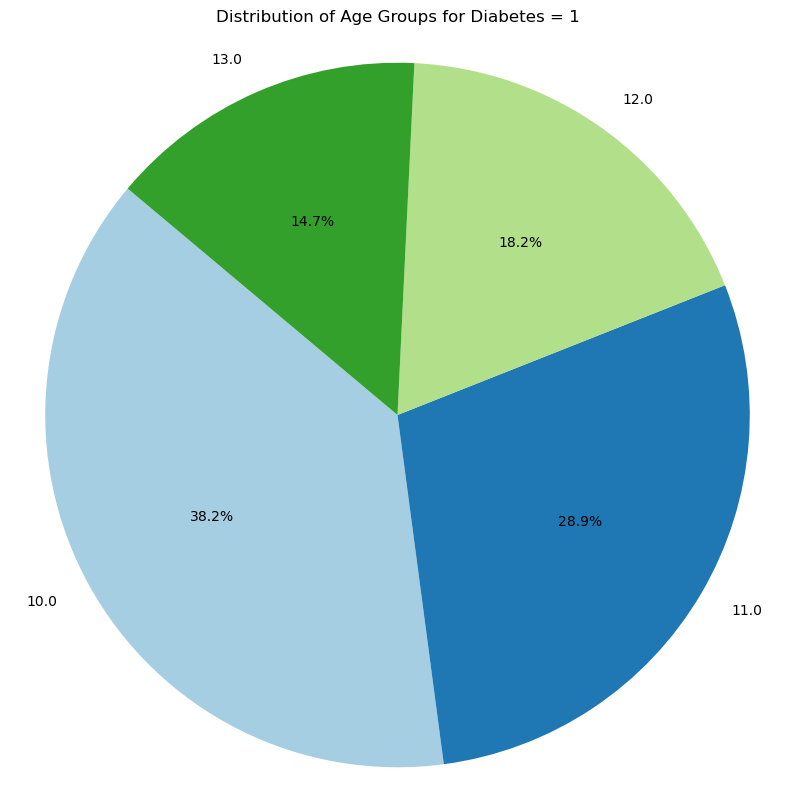

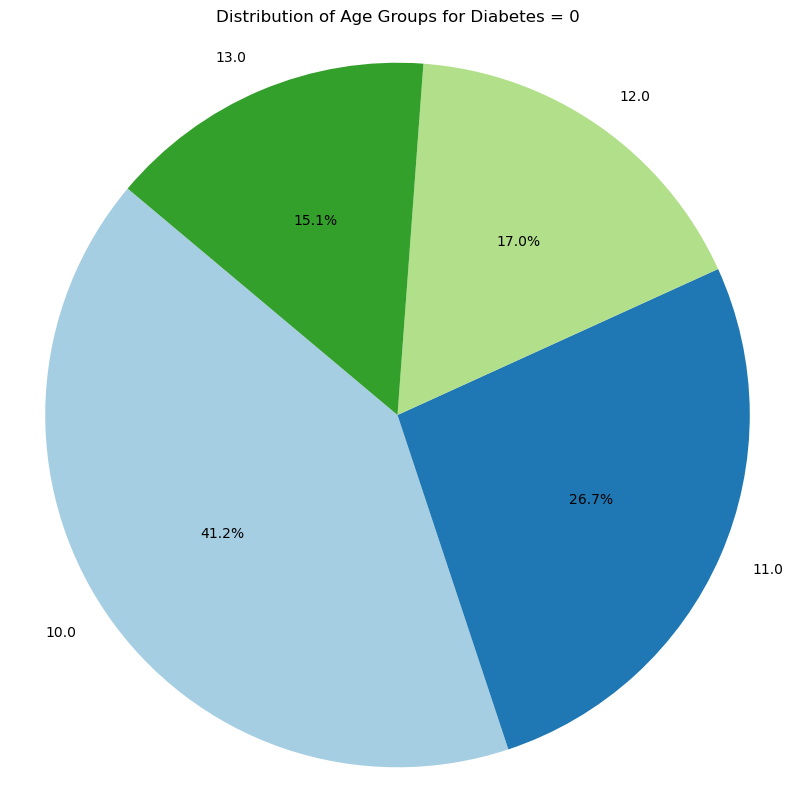

In [39]:
# split HeavyAlchoholConsumption with Diabetes

class_distribution = behavioural_raw_df['BMI'].value_counts()

# Filter the data to include only those with BMI > 25
alcohol_consumers = behavioural_raw_df[behavioural_raw_df['BMI'] > 25]

age_counts = alcohol_consumers[alcohol_consumers['Age'] >  9.0 ]  

print(age_counts['Age'].value_counts())

# for each age group, count the number of people who have diabetes and who don't have diabetes

# Group by age and diabetes status and count the number of occurrences
age_diabetes_counts = age_counts.groupby(['Age', 'Diabetes']).size().unstack(fill_value=0)

# Annotate 0 as No and 1 as Yes in age_diabetes_counts

age_diabetes_counts.columns = age_diabetes_counts.columns.map({0: 'No', 1: 'Yes'})


# Print the results
print(age_diabetes_counts)

# Create a pie chart for each age group showing the distribution of diabetes status
#age_diabetes_counts.plot(kind='pie', subplots=True, figsize=(20, 20), autopct='%1.1f%%', legend="")

# Create pie charts for each age group
for age in age_diabetes_counts.index:
    labels = ['No Diabetes', 'Diabetes']
    sizes = age_diabetes_counts.loc[age]
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)  # explode the 1st slice (No Diabetes)

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=140)
    plt.title(f'Diabetes Distribution for BMI > 25 and Age above {age * 6}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()


# Single pie chart with the aggregated data
labels = ['No Diabetes', 'Diabetes']
sizes = [age_diabetes_counts['No'].sum(), age_diabetes_counts['Yes'].sum()]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode the 1st slice (No Diabetes)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
    shadow=True, startangle=140)
plt.title('Diabetes Distribution for BMI > 25 and Age above 60')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Create a pie chart with all the age groups in df distributed as separate sections for Diabetes = 1

# Filter the data to include only those with Diabetes = 1
diabetes_positive = age_counts[age_counts['Diabetes'] == 1]

# Group by age and count the number of occurrences
age_group_counts = diabetes_positive['Age'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Age Groups for Diabetes = 1')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Create a pie chart with all the age groups in df distributed as separate sections for Diabetes = 0

# Filter the data to include only those with Diabetes = 0
diabetes_negative = age_counts[age_counts['Diabetes'] == 0]

# Group by age and count the number of occurrences
age_group_counts = diabetes_negative['Age'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Age Groups for Diabetes = 0')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()